In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Load the dataset
DJIA_path = '/content/drive/MyDrive/FINAL PROJECT/DJIA_table(train).csv'
df = pd.read_csv(DJIA_path)

In [42]:
# Display the first few rows and dataset info
print("First few rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

First few rows of the dataset:
         Date         Open         High          Low        Close    Volume  \
0  31-12-2015  17590.66016  17590.66016  17421.16016  17425.02930  93690000   
1  30-12-2015  17711.93945  17714.13086  17588.86914  17603.86914  59760000   
2  29-12-2015  17547.36914  17750.01953  17547.36914  17720.98047  69860000   
3  28-12-2015  17535.66016  17536.90039  17437.33984  17528.26953  59770000   
4  24-12-2015  17593.25977  17606.33984  17543.94922  17552.16992  40350000   

     Adj Close  
0  17425.02930  
1  17603.86914  
2  17720.98047  
3  17528.26953  
4  17552.16992  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1863 non-null   object 
 1   Open       1863 non-null   float64
 2   High       1863 non-null   float64
 3   Low        1863 non-null   float64
 4   Close      1863 non-null  

In [43]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values per column:")
print(missing_values)


Missing Values per column:
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [44]:
# Drop rows with missing values
df.dropna(inplace=True)

In [45]:
# Convert Date column to datetime format for time-based analysis
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)  # Set Date as index for easier time series analysis

<ipython-input-45-3dc2fe8390d6>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [46]:
# Basic summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               Open          High           Low         Close        Volume  \
count   1863.000000   1863.000000   1863.000000   1863.000000  1.863000e+03   
mean   13204.195193  13285.564853  13119.570584  13208.104880  1.662263e+08   
std     3080.633638   3072.306029   3089.839032   3081.319402  9.557187e+07   
min     6547.009766   6709.609863   6469.950195   6547.049805  8.410000e+06   
25%    10753.084960  10859.745115  10651.370115  10752.444825  1.018500e+08   
50%    12806.450200  12877.179690  12744.469730  12810.540040  1.392500e+08   
75%    16254.470215  16354.635255  16133.435060  16257.040040  1.972900e+08   
max    18315.060550  18351.359380  18272.560550  18312.390630  6.749200e+08   

          Adj Close  
count   1863.000000  
mean   13208.104880  
std     3081.319402  
min     6547.049805  
25%    10752.444825  
50%    12810.540040  
75%    16257.040040  
max    18312.390630  


In [47]:
# Check the balance of the dataset if it has a target label
# (For example, let's assume the dataset includes a 'Target' column where 1 represents an increase and 0 a decrease)
if 'Target' in df.columns:
    target_balance = df['Target'].value_counts(normalize=True)
    print("\nTarget Balance:")
    print(target_balance)

In [48]:
# Pre-processing steps

# Calculate daily price change and percentage change if not present
if 'Daily Change' not in df.columns:
    df['Daily Change'] = df['Close'].diff()
if 'Daily Percent Change' not in df.columns:
    df['Daily Percent Change'] = df['Close'].pct_change() * 100

In [49]:
# Scaling features (like Volume) for use in machine learning models
scaler = StandardScaler()
df['Volume_scaled'] = scaler.fit_transform(df[['Volume']])

In [50]:
# Correlation Analysis
# Correlation matrix for numerical columns
correlation_matrix = df.corr()

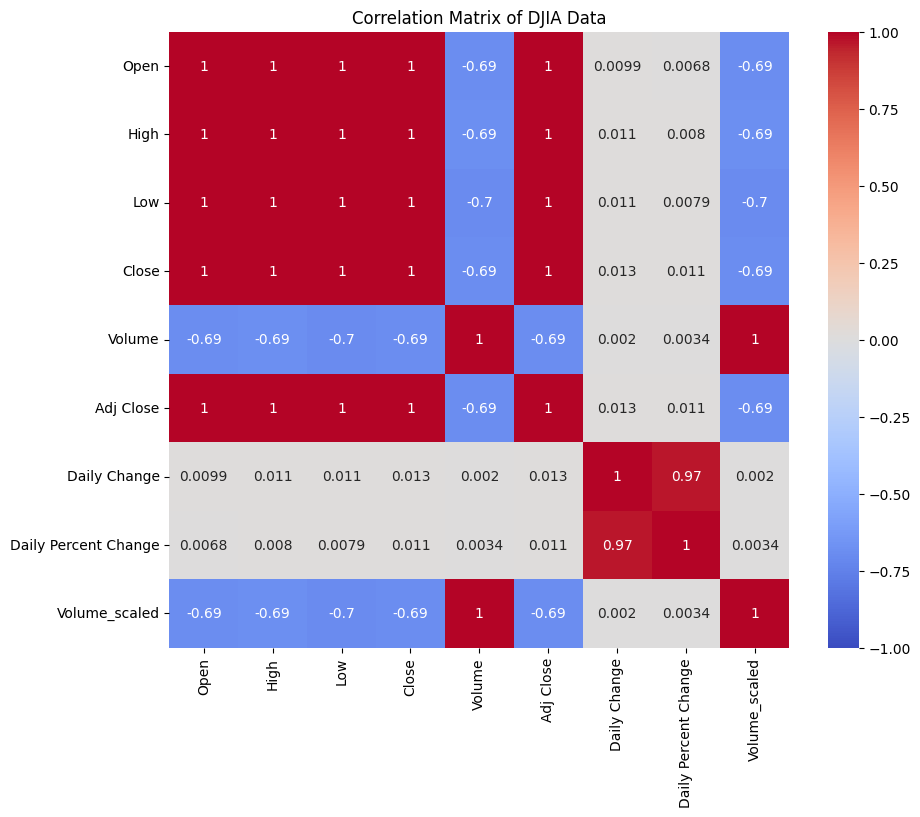

In [51]:
# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of DJIA Data")
plt.show()

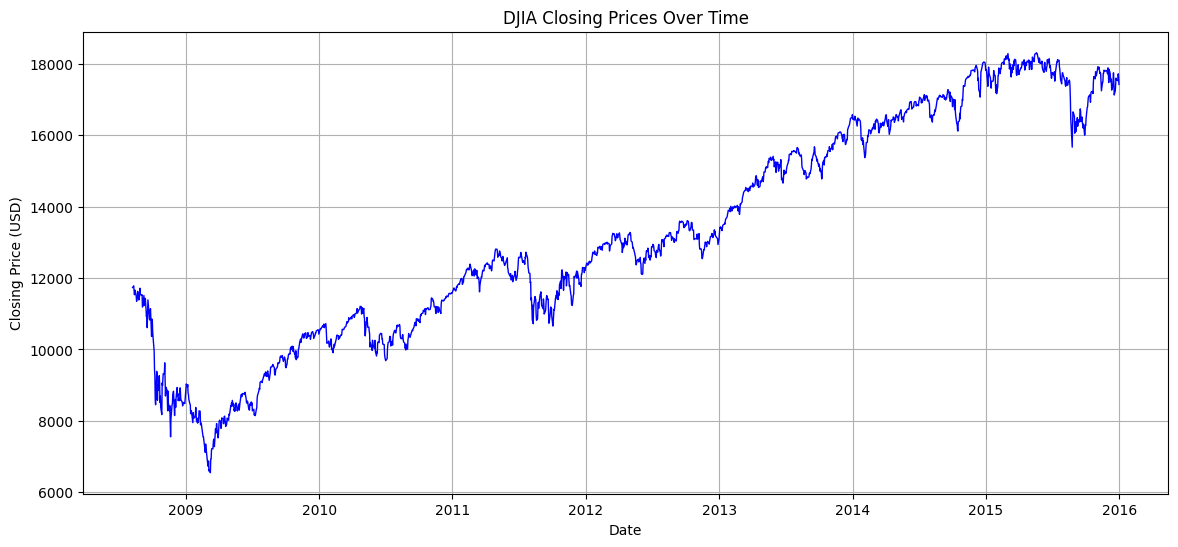

In [52]:
# Exploratory Visualizations

# Plot the closing prices over time
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], color='blue', linewidth=1)
plt.title("DJIA Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.grid()
plt.show()

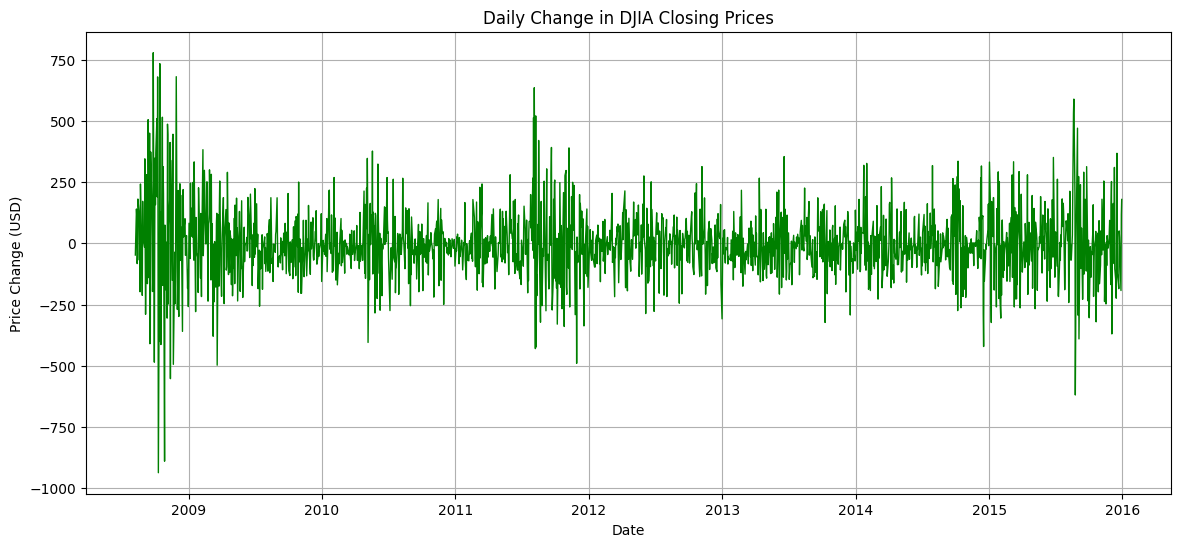

In [53]:
# Daily Change in DJIA Closing Prices
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Daily Change'], color='green', linewidth=1)
plt.title("Daily Change in DJIA Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price Change (USD)")
plt.grid()
plt.show()

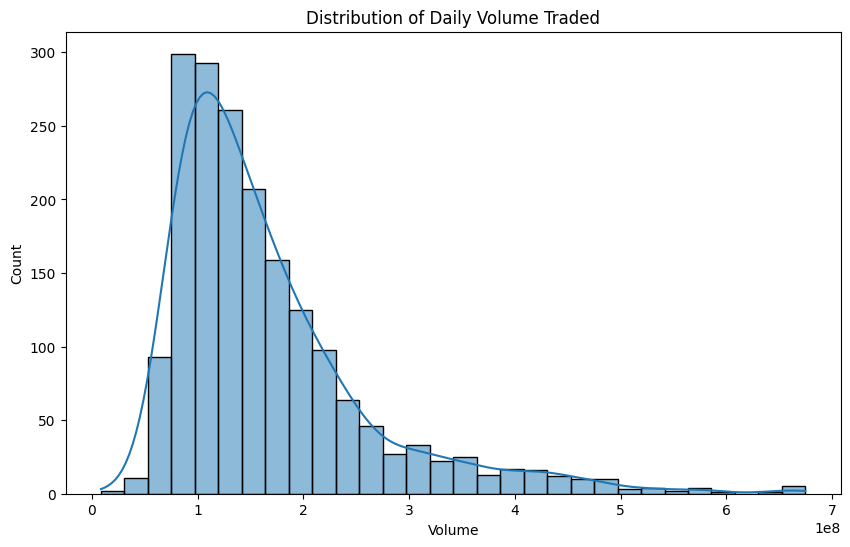

In [54]:
# Distribution of daily volume traded
plt.figure(figsize=(10, 6))
sns.histplot(df['Volume'], bins=30, kde=True)
plt.title("Distribution of Daily Volume Traded")
plt.xlabel("Volume")
plt.show()

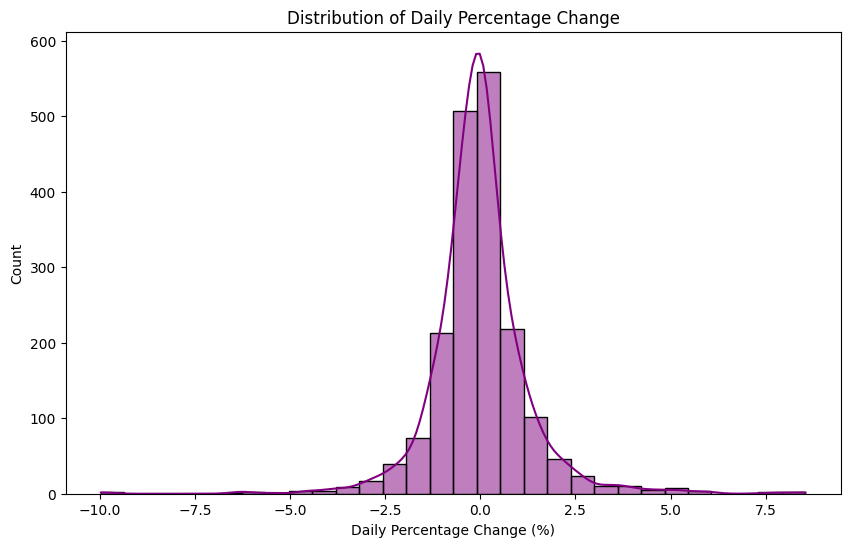

In [55]:
# Distribution of Daily Percentage Change
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Percent Change'].dropna(), bins=30, kde=True, color='purple')
plt.title("Distribution of Daily Percentage Change")
plt.xlabel("Daily Percentage Change (%)")
plt.show()